In [1]:
# Draw and demonstrate linear regression and polynomial regression line using python 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import math
import sklearn
import statistics

In [3]:
data=pd.read_csv('datasets\china-co2-csv.csv')
print(data)

     year        co2
0    1902      0.095
1    1903      1.964
2    1904      2.088
3    1905      2.297
4    1906     17.111
..    ...        ...
112  2014   9820.360
113  2015   9716.468
114  2016   9704.479
115  2017   9838.754
116  2018  10064.690

[117 rows x 2 columns]


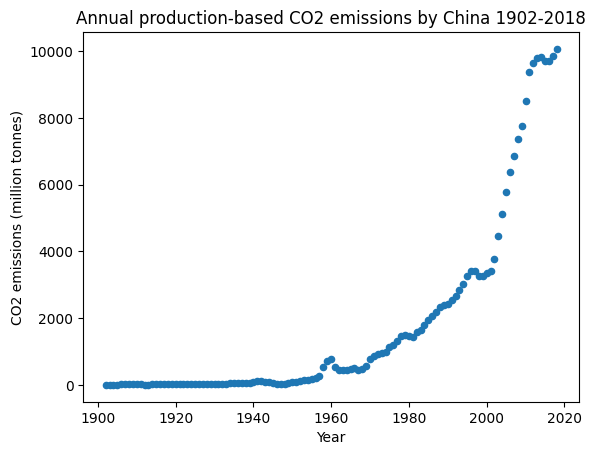

In [4]:
data.plot.scatter(x="year",y="co2")
plt.xlabel('Year') 
plt.ylabel('CO2 emissions (million tonnes)') 
plt.title ('Annual production-based CO2 emissions by China 1902-2018')
plt.show()

# Linear Regression

In [5]:
x=[]
y=[]
x=data['year'].to_numpy()
y=data['co2'].to_numpy()
n = np.size(x)

In [6]:
# Regression Line b0 + b1*x  
def estimate_coef(x, y): 
    m_x, m_y = np.mean(x), np.mean(y) 
    
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

In [7]:
def plot_regression_line(x, y, b): 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    y_pred = b[0] + b[1]*x 
      
    plt.plot(x, y_pred, color = "g") 
  
    plt.xlabel('Year') 
    plt.ylabel('CO2 emissions (million tonnes)')      
    plt.title ('Annual production-based CO2 emissions by China 1902-2018') 
    plt.legend(["Linear Regression","Actual"], loc ="lower right")
    plt.show() 

In [8]:
 def rmse(b,y):
    predict=[]
    for i in range(0,n):
        predict.append(b[0]+b[1]*x[i])
    predict=np.array(predict)    
    rmse_linear = np.sqrt(sklearn.metrics.mean_squared_error(y,predict))
    return(rmse_linear)

Estimated coefficients of the line y = b0 + b1*x are:
b0 = -127261.4302050189   
b1 = 65.84592892895174
RMSE Value by using Linear Regression is= 1705.0661924295737


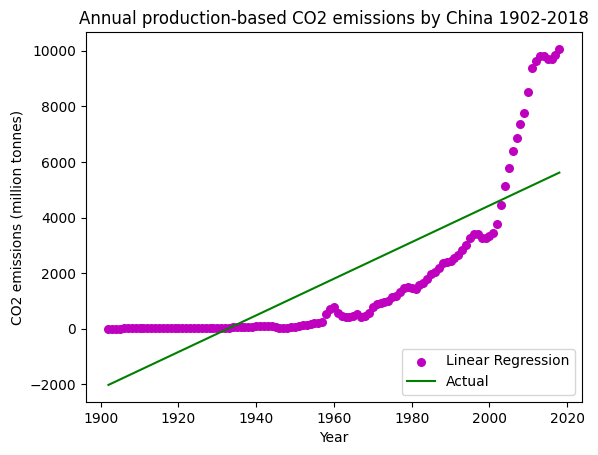

In [9]:
b = estimate_coef(x, y) 
print("Estimated coefficients of the line y = b0 + b1*x are:\nb0 = {}   \nb1 = {}".format(b[0], b[1])) 

residual_error = rmse(b,y)
print("RMSE Value by using Linear Regression is=",residual_error)

plot_regression_line(x, y, b)

# Polynomial Regression

In [10]:
import chart_studio
import chart_studio.plotly as py
import plotly.express as px

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [12]:
def viz_polymonial(X,Y, Y_poly,poly_degree):
    plt.scatter(X,Y, color='red')
    plt.plot(X,Y_poly, color='blue')
    plt.xlabel('Year') 
    plt.ylabel('CO2 emissions (million tonnes)') 
    plt.title ('Annual production-based CO2 emissions by China 1902-2018') 
    plt.legend(["Polynomial Regression degree "+ str(poly_degree),"Actual"], loc ="upper left")
    plt.show()
    
    return

RMSE Value by using Polynomial Regression is= 443.9556516455882


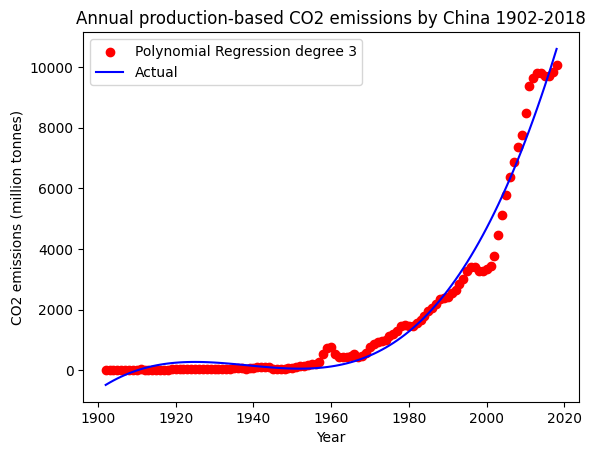

In [13]:
degree = 3
X = data.iloc[:, 0:1].values
poly_reg = PolynomialFeatures(degree)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
Y_poly = lin_reg.predict(X_poly)

rmse_poly = np.sqrt(sklearn.metrics.mean_squared_error(y,Y_poly))
print("RMSE Value by using Polynomial Regression is=",rmse_poly)   

viz_polymonial(X,y,Y_poly,degree)                
    